In [0]:
from google.colab import drive
drive.mount("gd")

Drive already mounted at gd; to attempt to forcibly remount, call drive.mount("gd", force_remount=True).


## Importing the libraries

In [0]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


print(tf.__version__)





1.14.0


## Preparing Training Data

In [0]:




training_set = pd.read_csv("gd/My Drive/Convolutional_Neural_Network/Cats_and_Dogs/Dataset/train.csv")


training_imgs = ["{}.jpg".format(x) for x in list(training_set.id)]

training_labels_1 = list(training_set['class_name'])

training_labels_2 = list(training_set['breed'])



training_set = pd.DataFrame( {'Images': training_imgs,'Animal': training_labels_1, 'Breed' : training_labels_2})


training_set.Animal = training_set.Animal.astype(str)

training_set.Breed = training_set.Breed.astype(str)



#Animals = ['Cat', 'Dog']

#cat_breeds = training_set[training_set['Animal'] == 1].Breed.unique()  #[11, 12, 14, 15, 13]

#dog_breeds = training_set[training_set['Animal'] == 2].Breed.unique()  #[21, 22, 23, 25, 24]




In [0]:
training_set['New_class'] = training_set['Animal'] + training_set['Breed']

In [0]:
training_set.head()

## Preprocessing Images

In [0]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dataGen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [0]:
train_generator = train_dataGen.flow_from_dataframe(dataframe = training_set, directory="gd/My Drive/Convolutional_Neural_Network/Cats_and_Dogs/Dataset/images_train/",
                                                  x_col="Images", y_col="Animal", 
                                                  class_mode="binary", target_size=(256,256), batch_size=32)

## Plotting Images

0.0


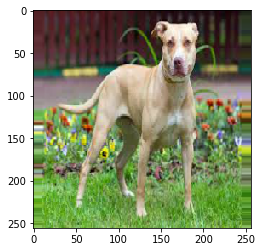

In [0]:
X, y = train_generator.next()

plt.plot()
plt.imshow(X[4].reshape(256,256,3), cmap=plt.get_cmap('BrBG_r'))
print(y[0])

## Building Convolutional Neural Network

> Indented block



In [0]:
classifier = Sequential()


In [0]:
# First Convolutional layer
classifier.add(Conv2D(filters = 56,kernel_size = (3,3), activation = 'relu', input_shape = (256,256,3)))

classifier.add(MaxPooling2D(pool_size = (2,2)))

#second Convolutional layer
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

#Flattening
classifier.add(Flatten())

# Hidden Layer
classifier.add(Dense(units = 64, activation = 'relu'))

#Output Layer
classifier.add(Dense(units = 10 , activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy','accuracy'])



W0711 11:42:30.693097 140560640157568 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 56)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 56)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      16160     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                7872576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

### Training the CNN

In [0]:

training_steps = train_generator.n/train_generator.batch_size

#STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

classifier.fit_generator(train_generator, epochs = 15, steps_per_epoch = 70 )
 

## Predicting For Test Set

## Preparing Test Data

In [0]:
test_set = pd.read_csv("gd/My Drive/Convolutional_Neural_Network/Cats_and_Dogs/Dataset/test.csv")


test_imgs = ["gd/My Drive/Convolutional_Neural_Network/Cats_and_Dogs/Dataset/images_test/{}.jpg".format(x) for x in list(test_set.id)]


test_set = pd.DataFrame( {'Images': test_imgs })


In [0]:
test_set.head()

,Images
0,gd/My Drive/Convolutional_Neural_Network/Cats_...
1,gd/My Drive/Convolutional_Neural_Network/Cats_...
2,gd/My Drive/Convolutional_Neural_Network/Cats_...
3,gd/My Drive/Convolutional_Neural_Network/Cats_...
4,gd/My Drive/Convolutional_Neural_Network/Cats_...


### Predicting for a single Image

In [0]:
from tensorflow.keras.preprocessing import image

img = image.load_img(path=test_set.Images[100],target_size=(256,256,3))#grayscale=True,
img = image.img_to_array(img)
test_img = img.reshape((1,256,256,3))
img_class = classifier.predict_classes(test_img)
prediction = img_class[0]

In [0]:
prediction

7

In [0]:
classes = train_generator.class_indices
print(classes)

{'1': 0, '2': 1}


### Predicting for the entire test set

In [0]:
inverted_classes = dict(map(reversed, classes.items()))

In [0]:
inverted_classes

{0: '111',
 1: '112',
 2: '113',
 3: '114',
 4: '115',
 5: '221',
 6: '222',
 7: '223',
 8: '224',
 9: '225'}

In [0]:
from keras.preprocessing import image

Y_pred = []
for i in range(len(test_set)):
  img = image.load_img(path= test_set.Images[i],target_size=(256,256,3))#grayscale=True,
  img = image.img_to_array(img)
  test_img = img.reshape((1,256,256,3))
  img_class = classifier.predict_classes(test_img)
  prediction = img_class[0]
  Y_pred.append(prediction)

Using TensorFlow backend.


In [0]:
Y_pred

[1,
 0,
 6,
 1,
 1,
 6,
 1,
 7,
 1,
 6,
 8,
 6,
 6,
 1,
 1,
 8,
 1,
 1,
 1,
 0,
 6,
 8,
 6,
 6,
 9,
 6,
 6,
 1,
 1,
 7,
 1,
 0,
 1,
 9,
 6,
 1,
 7,
 1,
 6,
 8,
 0,
 1,
 0,
 7,
 1,
 0,
 6,
 6,
 6,
 1,
 1,
 6,
 9,
 8,
 7,
 1,
 1,
 8,
 6,
 6,
 6,
 1,
 6,
 9,
 6,
 1,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 7,
 5,
 1,
 1,
 1,
 6,
 6,
 6,
 1,
 1,
 9,
 6,
 6,
 5,
 9,
 7,
 9,
 6,
 1,
 1,
 1,
 6,
 9,
 6,
 6,
 6,
 0,
 7,
 6,
 6,
 6,
 6,
 0,
 9,
 9,
 6,
 7,
 6,
 1,
 7,
 7,
 7,
 1,
 6,
 8,
 5,
 9,
 6,
 0,
 6,
 6,
 1,
 9,
 1,
 1,
 0,
 6,
 5,
 7,
 9,
 9,
 1,
 1,
 8,
 6,
 0,
 1,
 6,
 6,
 1,
 9,
 1,
 6,
 6,
 6,
 8,
 9,
 9,
 7,
 9,
 6,
 1,
 6,
 6,
 1,
 9,
 1,
 6,
 1,
 6,
 0,
 9,
 1,
 5,
 6,
 0,
 5,
 6,
 9,
 6,
 6,
 9,
 9,
 9,
 6,
 0,
 1,
 6,
 7,
 9,
 6,
 0,
 6,
 9,
 6,
 1,
 6,
 6,
 6,
 1,
 6,
 6,
 2,
 6,
 6,
 1,
 1,
 1,
 7,
 9,
 6,
 6,
 9,
 6,
 6,
 5,
 0,
 9,
 6,
 5,
 1,
 5,
 9,
 5,
 6,
 9,
 1,
 6,
 1,
 9,
 5,
 9,
 6,
 1,
 7,
 8,
 1,
 8,
 1,
 9,
 9,
 5,
 6,
 6,
 6,
 0,
 6,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 8,
 1,
 6,


In [0]:
prediction_classes = [ inverted_classes.get(item,item) for item in Y_pred ]


In [0]:
prediction_classes

['112',
 '111',
 '222',
 '112',
 '112',
 '222',
 '112',
 '223',
 '112',
 '222',
 '224',
 '222',
 '222',
 '112',
 '112',
 '224',
 '112',
 '112',
 '112',
 '111',
 '222',
 '224',
 '222',
 '222',
 '225',
 '222',
 '222',
 '112',
 '112',
 '223',
 '112',
 '111',
 '112',
 '225',
 '222',
 '112',
 '223',
 '112',
 '222',
 '224',
 '111',
 '112',
 '111',
 '223',
 '112',
 '111',
 '222',
 '222',
 '222',
 '112',
 '112',
 '222',
 '225',
 '224',
 '223',
 '112',
 '112',
 '224',
 '222',
 '222',
 '222',
 '112',
 '222',
 '225',
 '222',
 '112',
 '222',
 '222',
 '111',
 '222',
 '222',
 '222',
 '222',
 '223',
 '221',
 '112',
 '112',
 '112',
 '222',
 '222',
 '222',
 '112',
 '112',
 '225',
 '222',
 '222',
 '221',
 '225',
 '223',
 '225',
 '222',
 '112',
 '112',
 '112',
 '222',
 '225',
 '222',
 '222',
 '222',
 '111',
 '223',
 '222',
 '222',
 '222',
 '222',
 '111',
 '225',
 '225',
 '222',
 '223',
 '222',
 '112',
 '223',
 '223',
 '223',
 '112',
 '222',
 '224',
 '221',
 '225',
 '222',
 '111',
 '222',
 '222',
 '112',


In [0]:
animal = []
breed = []
for i in prediction_classes:
  animal.append(i[0])
  breed.append(i[1:])
  
  

In [0]:
predictions = {}

predictions['class_name'] = animal

predictions['breed'] = breed


In [0]:
pd.DataFrame(predictions)

,class_name,breed
0,1,12
1,1,11
2,2,22
3,1,12
4,1,12
5,2,22
6,1,12
7,2,23
8,1,12
9,2,22


### Writing into file

In [0]:
pd.DataFrame(predictions).to_excel("gd/My Drive/Convolutional_Neural_Network/Cats_and_Dogs/Predictions/cats_dogs_6.xlsx", index = False)